# DATA 602 Project: Sentiment Analysis on Amazon Reviews

* Perform the necessary transformations to train a regression and classification models the overall field in the data set. This should include creating the correctly sized training and test sets.

* When performing the classification task, use overall less than 3 as bad, greater than 3 as good, and 3 as neutral.

# Abstract

Natural language processing is used in sentiment or opinion analysis to extract a significant pattern of knowledge from a big volume of textual input. It looks at the writer's comments, feelings, beliefs, points of view, questions, preferences, attitudes, and demands in a string of text. Subjectivity (objective and subjective), polarity (negative, positive, and neutral), and emotions are used to extract the writer's feelings (angry, happy, surprised, sad, jealous, and mixed).

Sentiment Analysis is process using text analytics to obtain various data sources from the internet and various social media platforms. The objective of sentiment analysis to get some insight from the text, ex. reviews, tweets, news description and many more.The majority of sentiment analysis approaches take one of two forms: polarity-based, where pieces of texts are classified as either positive or negative, or valence-based, where the intensity of the sentiment is taken into account. For example, the words ‘good’ and ‘excellent’ would be treated the same in a polarity-based approach, whereas ‘excellent’ would be treated as more positive than ‘good’ in a valence-based approach
 
This project applies various machine learning algorithms to predict the sentiment based of a review. 

In [ ]:
#!pip install wordcloud

In [ ]:
#!pip install keras
!pip install tensorflow

In [ ]:
# Libraries to work with arrays and dataframes
import pandas as pd 
import numpy as np

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

# Libraries for Natural Language Processing
import nltk
import re
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from tqdm import tqdm


# Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor

# Deep Learning Libraries
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelEncoder


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
!curl http://deepyeti.ucsd.edu/jianmo/amazon/categoryFilesSmall/Cell_Phones_and_Accessories_5.json.gz -o reviews.json.gz
!gunzip reviews.json.gz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  161M  100  161M    0     0  70.2M      0  0:00:02  0:00:02 --:--:-- 70.2M
gzip: reviews.json already exists; do you wish to overwrite (y or n)? y
y


In [ ]:
!lsy

/bin/bash: lsy: command not found


In [ ]:
reviews = pd.read_json('/content/reviews.json', lines= True,)
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5,True,"08 4, 2014",A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN
1,5,True,"02 12, 2014",A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN
2,3,True,"02 8, 2014",AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN
3,2,True,"02 4, 2014",A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN
4,4,True,"02 3, 2014",A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN


In [ ]:
# Creating a copy of the dataframe.
reviews_copy = reviews.copy()

## Preprocessing the data

In [ ]:
# Checking for the rows and column.
reviews.shape

(1128437, 12)

In [ ]:
# Converting the reviewTime to DateTime object
reviews['reviewTime'] = pd.to_datetime(reviews['reviewTime'])
type(reviews['reviewTime'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Function to give review sentiment.
def sentiment(x):
  if(x>3):
    return 2
  if(x<3):
    return 0
  return 1

**Creating a sentiment column**

*   0 - Negative
*   1 - Neutral
* 2 - Positive



In [ ]:
# Creating a sentiment column
sent = reviews['overall']
reviews['Sentiment'] = sent.map(sentiment)
reviews['Sentiment'].unique()

array([2, 1, 0])

In [ ]:
# Look at the data
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image,Sentiment
0,5,True,2014-08-04,A24E3SXTC62LJI,7508492919,{'Color:': ' Bling'},Claudia Valdivia,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,NaN,NaN,2
1,5,True,2014-02-12,A269FLZCB4GIPV,7508492919,NaN,sarah ponce,When you don't want to spend a whole lot of ca...,1,1392163200,NaN,NaN,2
2,3,True,2014-02-08,AB6CHQWHZW4TV,7508492919,NaN,Kai,"so the case came on time, i love the design. I...",Its okay,1391817600,NaN,NaN,1
3,2,True,2014-02-04,A1M117A53LEI8,7508492919,NaN,Sharon Williams,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,NaN,NaN,0
4,4,True,2014-02-03,A272DUT8M88ZS8,7508492919,NaN,Bella Rodriguez,"I liked it because it was cute, but the studs ...",Cute!,1391385600,NaN,NaN,2


In [ ]:
reviews.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image', 'Sentiment'],
      dtype='object')

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1128437 entries, 0 to 1128436
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   overall         1128437 non-null  int64         
 1   verified        1128437 non-null  bool          
 2   reviewTime      1128437 non-null  datetime64[ns]
 3   reviewerID      1128437 non-null  object        
 4   asin            1128437 non-null  object        
 5   style           605241 non-null   object        
 6   reviewerName    1128302 non-null  object        
 7   reviewText      1127672 non-null  object        
 8   summary         1127920 non-null  object        
 9   unixReviewTime  1128437 non-null  int64         
 10  vote            92034 non-null    object        
 11  image           27107 non-null    object        
 12  Sentiment       1128437 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(3), object(8)
memory usage: 104.4+ 

In [ ]:
# Dropping the duplicate data
reviews = reviews.drop_duplicates(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote'])
reviews.shape

(1124555, 13)

* Rows initially: **1128437**
* Rows after dropping duplicates: **1124555**

**Handling Null Values**

In [ ]:
# Checking for null values
reviews.isnull().sum()

overall                 0
verified                0
reviewTime              0
reviewerID              0
asin                    0
style              520603
reviewerName          135
reviewText            762
summary               515
unixReviewTime          0
vote              1033031
image             1097473
Sentiment               0
dtype: int64

* Highest number of missing values are in vote, image and style.
* I think that those three columns does not impact much on our reviews. So, I decided to drop them.
* Even the review name also doesn't impact much on the sentiment so I decidec to drop it.



In [ ]:
# dropping the columns 
reviews = reviews.drop(['vote', 'image', 'style', 'reviewerName'], axis=1)

In [ ]:
# Resetting the index after dropping the values.
reviews = reviews.reset_index(drop=True)
reviews.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,Sentiment
1124550,4,True,2016-12-22,A1QWMCG1FNEP3A,B01HJC7N4C,Good for viewing. But doesn't have a button or...,Good,1482364800,2
1124551,5,False,2016-07-15,A3FOBEJ9UVUTR3,B01HJC7N4C,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,2
1124552,5,False,2016-07-14,AMUEAMKB4E33M,B01HJC7N4C,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,2
1124553,5,False,2016-07-13,A2EV91MMOJ3IL4,B01HJC7N4C,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,2
1124554,5,True,2017-05-11,ARKQD9Z1VPOV2,B01HJH9IN6,i love it,Five Stars,1494460800,2


In [ ]:
# Checking the shape
reviews.shape

(1124555, 9)

* I'm leaving the **reviewText** and **summary** columns as it is because for the rows in which the review text and summary is missing the rating(overall) parameter will decide the sentiment.

### Text Preprocessiong

In [ ]:
# Concatenating the summary and reviewText
text_data = reviews['summary'] + reviews['reviewText']
text_data.head()

0    Can't stop won't stop looking at itLooks even ...
1    1When you don't want to spend a whole lot of c...
2    Its okayso the case came on time, i love the d...
3    CASEDON'T CARE FOR IT.  GAVE IT AS A GIFT AND ...
4    Cute!I liked it because it was cute, but the s...
dtype: object

In [ ]:
# Concatenating text with rating
text_data = pd.DataFrame({"text" : text_data, "rating" : reviews.overall, "Sentiment" : reviews.Sentiment})
text_data.head()

,text,rating,Sentiment
0,Can't stop won't stop looking at itLooks even ...,5,2
1,1When you don't want to spend a whole lot of c...,5,2
2,"Its okayso the case came on time, i love the d...",3,1
3,CASEDON'T CARE FOR IT. GAVE IT AS A GIFT AND ...,2,0
4,"Cute!I liked it because it was cute, but the s...",4,2


In [ ]:
# Calculating the length of the text
text_data['len_of_text'] = text_data['text'].str.split().str.len()
text_data.head()

,text,rating,Sentiment,len_of_text
0,Can't stop won't stop looking at itLooks even ...,5,2,55.0
1,1When you don't want to spend a whole lot of c...,5,2,22.0
2,"Its okayso the case came on time, i love the d...",3,1,52.0
3,CASEDON'T CARE FOR IT. GAVE IT AS A GIFT AND ...,2,0,20.0
4,"Cute!I liked it because it was cute, but the s...",4,2,31.0


### EDA

**Distribution of Rating**

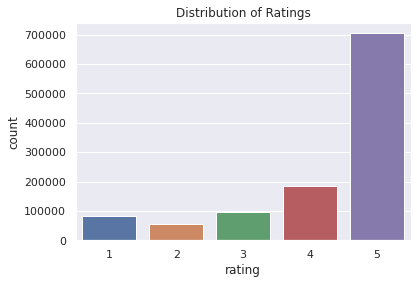

In [ ]:
# Plotting the distribution of ratings.
sns.set(style='darkgrid')
sns.countplot(x = 'rating', data= text_data)
plt.title("Distribution of Ratings")
plt.show()

**Observation:** The distribution of ratings is not uniform. There are large number of reviews with rating 5 followed by rating 4.

**Word Count per rating**

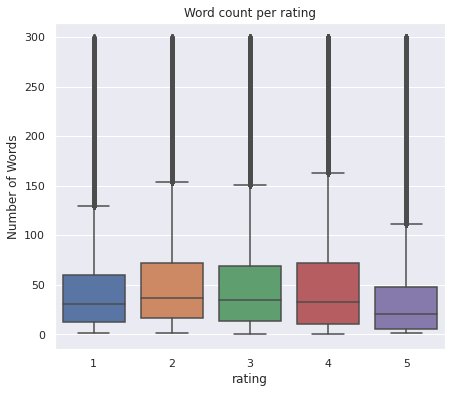

In [ ]:
# Plotting word count per rating
plt.figure(figsize=(7, 6))
sns.boxplot(x = 'rating', y = 'len_of_text', data = text_data[text_data['len_of_text'] < 300])# Considering the max words to 300.
plt.title("Word count per rating")
plt.ylabel("Number of Words")
plt.show()

**Observation:** Reviews with rating 5 tend to to be smaller than other reviews.

## Word Cloud
**Function to plot a Word Cloud**

In [ ]:
# Reference: https://www.geeksforgeeks.org/generating-word-cloud-python/
def wordcloud(text):

  comment_words = ''
  stopwords = set(STOPWORDS)

# iterate through the csv file 
  for val in text: 
      
    # typecaste each val to string 
      val = str(val) 
  
    # split the value 
      tokens = val.split() 
      
    # Converts each token into lowercase 
      for i in range(len(tokens)): 
          tokens[i] = tokens[i].lower() 
      
      comment_words += " ".join(tokens)+" "
  
  wordcloud = WordCloud(width = 800, height = 800, 
                  background_color ='white', 
                  stopwords = stopwords, 
                  min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
  plt.figure(figsize = (8, 8), facecolor = None) 
  plt.imshow(wordcloud)
  plt.axis("off") 
  plt.tight_layout(pad = 0) 
  plt.show()


**1. Word Cloud for Negative Reviews**

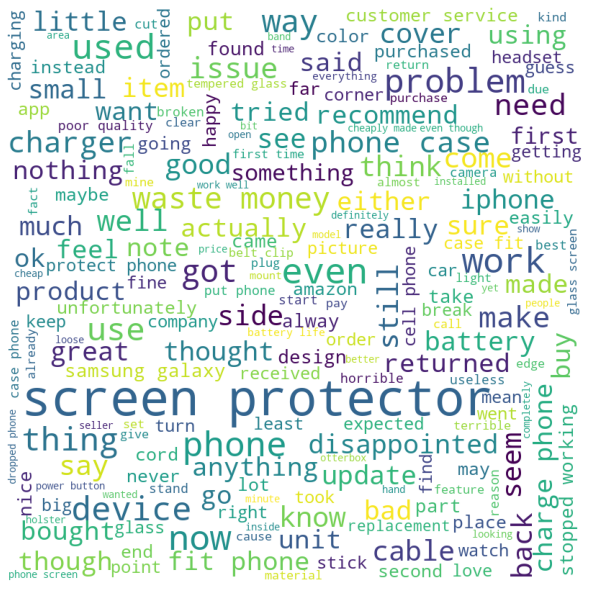

In [ ]:
wordcloud(text_data[text_data['Sentiment']==0]['text'])

**Observation:** We can find few -ve words like **disappinted**, **problem**, **issue**, etc.

**2.Word Cloud for Positive reviews**

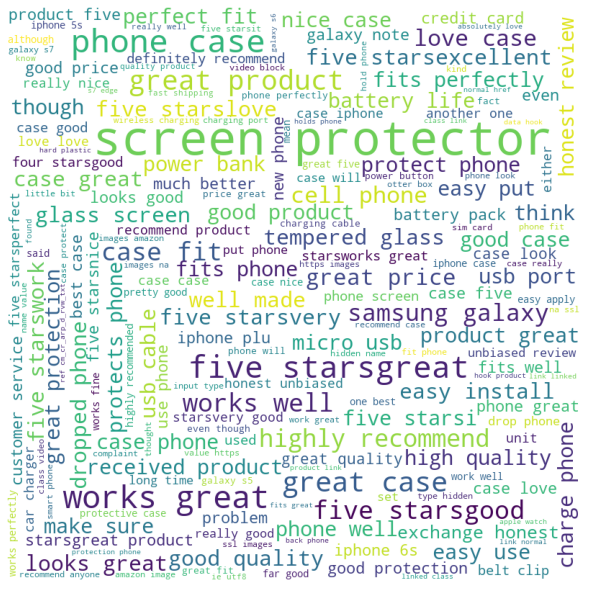

In [ ]:
wordcloud(text_data[text_data['Sentiment']==2]['text'])

**Observation:** We can find few +ve words like **great**, **perfect**, **works well**, **good quality**

**3.Word Cloud for Neutral Reviews**

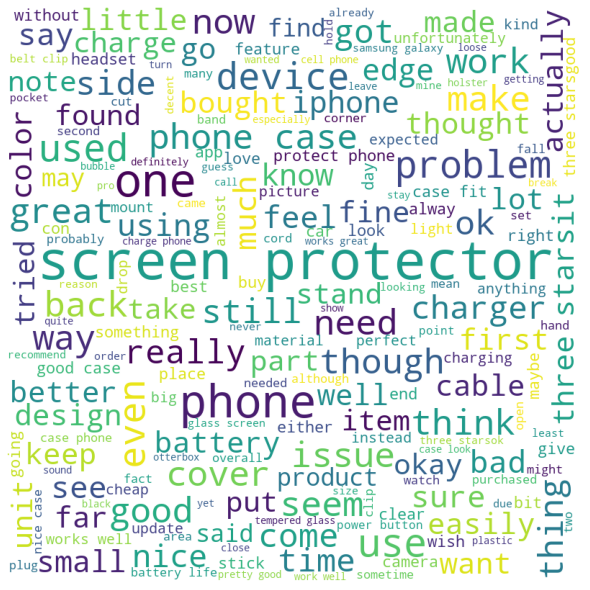

In [ ]:
# WordCloud for neutral reviews
wordcloud(text_data[text_data['Sentiment']==1]['text'])

**Obsevation:** We find both positive words like **good**, **nice**, **better**, etc. and negative words like **bad**, **problem**.

## Training and evaluating the different classification and regression models

**Machine Learning Models**

**1. Classification using Random Forest Model**

In [ ]:
# Removing the null values from the text_data.
text_data_tf = text_data.dropna()

In [ ]:
# Train test split.
train_x, test_x, train_y, test_y = train_test_split(text_data_tf.text, text_data_tf.Sentiment, test_size = 0.1, random_state = 1)
print('# Train data samples:', train_x.shape[0])
print('# Test data samples:', test_y
      .shape[0])

# Train data samples: 1010994
# Test data samples: 112333


In [ ]:
# importing TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [ ]:
# Converting the train and test reviews data to tfidf vectors
tfidf = TfidfVectorizer()
train_x_vectors = tfidf.fit_transform(train_x)
test_x_vectors = tfidf.transform(test_x)
train_x_vectors

<1010994x247959 sparse matrix of type '<class 'numpy.float64'>'
	with 34586506 stored elements in Compressed Sparse Row format>

In [ ]:
# Training a randomForset Model
rfc = RandomForestClassifier(n_estimators= 25, max_depth= 15)
rfc.fit(train_x_vectors, train_y)

RandomForestClassifier(max_depth=15, n_estimators=25)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# Evaluating the above model.
preds = rfc.predict(test_x_vectors)
print("Accuracy:", accuracy_score(test_y, preds))
confusion_matrix(preds, test_y)

Accuracy: 0.790453384134671


array([[    0,     0,     0],
       [    0,     0,     0],
       [13700,  9839, 88794]])

**Observation:** We got 79% but the model predicted everything as class 5. It has done a very bad job.

**2. Classification using Logistic Regression**

In [ ]:
# Training a Descision tree
logistic = LogisticRegression()
logistic.fit(train_x_vectors,train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
# Evaluating the model
preds = logistic.predict(test_x_vectors)
print("Accuracy:", accuracy_score(test_y, preds))
confusion_matrix(preds, test_y)

Accuracy: 0.8996732927990885


array([[10591,  1762,  1221],
       [  732,  3928,  1029],
       [ 2377,  4149, 86544]])

**Observation:** We got a pretty good accuracy using Logistic Regression. We got almost 90% accuracy.

### Text Preprocessing for Deep Learning Models

**Reference:** https://github.com/bertcarremans/TwitterUSAirlineSentiment/blob/master/source/Using%20Word%20Embeddings%20for%20Sentiment%20Analysis.ipynb

In [ ]:
preprocessed_reviews = []
# tqdm is for printing the status bar
for sentence in tqdm(text_data['text'].values):
  sentence = str(sentence).lower() # Converting to lower case
  sentence = re.sub(" \d+", " ", sentence) # removing digits
  sentance = re.sub(r"http\S+", "", sentence) # Removing URL's 
  sentance = re.sub("\S*\d\S*", "", sentence).strip() # Removing words with numbers
  sentance = re.sub('[^A-Za-z]+', ' ',sentence) # removing special charecters.

  preprocessed_reviews.append(sentance)
  

100%|██████████| 1124555/1124555 [00:59<00:00, 18885.68it/s]


In [ ]:
text_data['text'] = preprocessed_reviews

In [ ]:
# Function Removing stop words
def remove_stopwords(input_text):
    '''
    Function to remove English stopwords from a Pandas Series.
    
    Parameters:
        input_text : text to clean
    Output:
        cleaned Pandas Series 
    '''
    stopwords_list = stopwords.words('english')
    # Some words which might indicate a certain sentiment are kept via a whitelist
    whitelist = ["n't", "not", "no"]
    words = input_text.split() 
    clean_words = [word for word in words if (word not in stopwords_list or word in whitelist) and len(word) > 1] 
    return " ".join(clean_words)

# Calling the function
text_data['text'] =  text_data.text.apply(remove_stopwords)

**3. Classification Using LSTM Model**

In [ ]:
# Parameters to the model.

NB_WORDS = 25000  # Parameter indicating the number of words we'll put in the dictionary
MAX_LEN = 300  # Maximum number of words in a sequence
VAL_SIZE = 1000  # Size of the validation set
NB_START_EPOCHS = 10  # Number of epochs we usually start to train with
BATCH_SIZE = 2048  # Size of the batches used in the mini-batch gradient descent

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_data.text, text_data.Sentiment, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])

# Train data samples: 1012099
# Test data samples: 112456


**Converting words to numbers**

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

**Creating word sequences of equal length**

In [ ]:
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [ ]:
X_test_seq_trunc[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

**Converting the target class to categorical**

In [ ]:
y_train_cat = to_categorical(y_train, num_classes= 3)
y_test_cat = to_categorical(y_test, num_classes= 3)

**Building the Model**

In [ ]:
model = Sequential()
model.add(Embedding(NB_WORDS, 128, input_length= MAX_LEN))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation= 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          3200000   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 3,331,971
Trainable params: 3,331,971
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])

**Training the model**

In [ ]:
history = model.fit( X_train_seq_trunc,
                     y_train_cat,
                     epochs = 5, 
                     batch_size = 2048, 
                     verbose = 1, 
                     validation_data=(X_test_seq_trunc, y_test_cat))

Epoch 1/5
495/495 [==============================] - 658s 1s/step - loss: 0.3383 - accuracy: 0.8758 - val_loss: 0.2627 - val_accuracy: 0.9007
Epoch 2/5
495/495 [==============================] - 647s 1s/step - loss: 0.2492 - accuracy: 0.9058 - val_loss: 0.2545 - val_accuracy: 0.9058
Epoch 3/5
495/495 [==============================] - 646s 1s/step - loss: 0.2320 - accuracy: 0.9119 - val_loss: 0.2435 - val_accuracy: 0.9080
Epoch 4/5
495/495 [==============================] - 649s 1s/step - loss: 0.2197 - accuracy: 0.9163 - val_loss: 0.2452 - val_accuracy: 0.9074
Epoch 5/5
495/495 [==============================] - 643s 1s/step - loss: 0.2085 - accuracy: 0.9204 - val_loss: 0.2430 - val_accuracy: 0.9092


Accuracy on the training set: **91.68%**

Accuracy on the test set: **90.82%**

**Saving the model**

In [ ]:
# Saving the model
# Reference: https://machinelearningmastery.com/save-load-keras-deep-learning-models/

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


**Plotting Learning Curves**

In [ ]:
# function to plot curves

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

**1. Accuracy Curve**

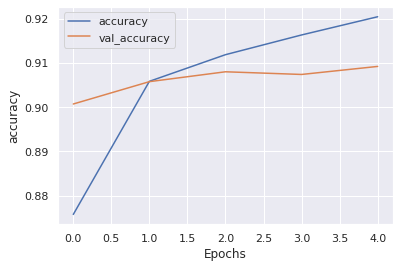

In [ ]:
plot_graphs(history, 'accuracy')

**2. Loss Curve**

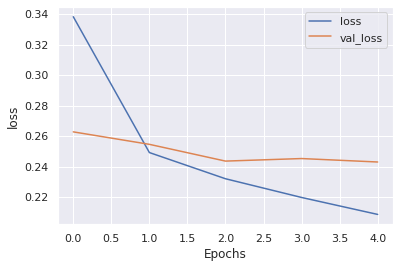

In [ ]:
plot_graphs(history, 'loss')

**4. Regression using LSTM model**

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_data.text, text_data.rating, test_size=0.1, random_state=37)
print('# Train data samples:', X_train.shape[0])
print('# Test data samples:', X_test.shape[0])

# Train data samples: 1012099
# Test data samples: 112456


**Converting words to numbers**

In [ ]:
tk = Tokenizer(num_words=NB_WORDS,
               lower=True,
               split=" ")
tk.fit_on_texts(X_train)

X_train_seq = tk.texts_to_sequences(X_train)
X_test_seq = tk.texts_to_sequences(X_test)

**Creating word sequences of equal length**

In [ ]:
from keras.preprocessing.sequence import pad_sequences
X_train_seq_trunc = pad_sequences(X_train_seq, maxlen=MAX_LEN)
X_test_seq_trunc = pad_sequences(X_test_seq, maxlen=MAX_LEN)

In [ ]:
X_test_seq_trunc[10]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

**Building the Model**

In [ ]:
model = Sequential()
model.add(Embedding(NB_WORDS, 128, input_length= MAX_LEN))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 128)          3200000   
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 3,339,905
Trainable params: 3,339,905
Non-trainable params: 0
_________________________________________________________________


**Compiling the model**

In [ ]:
model.compile(loss = 'mse', optimizer='adam',metrics = ['mse'])

**Training the model**

In [ ]:
history = model.fit( X_train_seq_trunc,
                     y_train,
                     epochs = 5, 
                     batch_size = 2048, 
                     verbose = 1, 
                     validation_data=(X_test_seq_trunc, y_test))

Epoch 1/5
495/495 [==============================] - 651s 1s/step - loss: 1.1224 - mse: 1.1224 - val_loss: 0.4663 - val_mse: 0.4663
Epoch 2/5
495/495 [==============================] - 644s 1s/step - loss: 0.4326 - mse: 0.4326 - val_loss: 0.4054 - val_mse: 0.4054
Epoch 3/5
495/495 [==============================] - 640s 1s/step - loss: 0.3756 - mse: 0.3756 - val_loss: 0.3768 - val_mse: 0.3768
Epoch 4/5
495/495 [==============================] - 634s 1s/step - loss: 0.3440 - mse: 0.3440 - val_loss: 0.3691 - val_mse: 0.3691
Epoch 5/5
495/495 [==============================] - 645s 1s/step - loss: 0.3232 - mse: 0.3232 - val_loss: 0.3651 - val_mse: 0.3651


**Metrics**

Mean Squared Error on Training set: **0.3191**

Mean Squared Error on Test Set: **0.3597**

## Part 2:

**5. Classification using a Random Forest Model**

* Predicting the rating using the above Regression model and then joining the predicted rating to the original dataframe.
* Preprocessing the original dataframe and then building a classification model to classify the sentiment.
* Compare the accuracy with the LSTM model.

In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np

from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Model Selection
from sklearn.model_selection import RandomizedSearchCV

**Using the model to predict class labebs of the reviews and appending those predictions to the reviews dataframe**

In [ ]:
# Tokenizing and padding the text data.
review_text = tk.texts_to_sequences(text_data.text)
review_text_padded = pad_sequences(review_text, maxlen=MAX_LEN)

In [ ]:
# Using the model to predict the sentiment on reviews
predicted = model.predict(review_text_padded)

In [ ]:
# Converting the probabilities to Dataframe
pred_df = pd.DataFrame(predicted)

In [ ]:
# Putting the class_labels to the reviews DataFrame.
reviews['rating_pred'] = pred_df

In [ ]:
# Displaying the top 5 rows
reviews.head()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,Sentiment,rating_pred
0,5,True,2014-08-04,A24E3SXTC62LJI,7508492919,Looks even better in person. Be careful to not...,Can't stop won't stop looking at it,1407110400,2,4.353028
1,5,True,2014-02-12,A269FLZCB4GIPV,7508492919,When you don't want to spend a whole lot of ca...,1,1392163200,2,4.571429
2,3,True,2014-02-08,AB6CHQWHZW4TV,7508492919,"so the case came on time, i love the design. I...",Its okay,1391817600,1,4.074277
3,2,True,2014-02-04,A1M117A53LEI8,7508492919,DON'T CARE FOR IT. GAVE IT AS A GIFT AND THEY...,CASE,1391472000,0,2.468443
4,4,True,2014-02-03,A272DUT8M88ZS8,7508492919,"I liked it because it was cute, but the studs ...",Cute!,1391385600,2,3.650364


In [ ]:
# Displaying  the bottom 5 rows of reviews dataframe
reviews.tail()

,overall,verified,reviewTime,reviewerID,asin,reviewText,summary,unixReviewTime,Sentiment,rating_pred
1124550,4,True,2016-12-22,A1QWMCG1FNEP3A,B01HJC7N4C,Good for viewing. But doesn't have a button or...,Good,1482364800,2,3.940682
1124551,5,False,2016-07-15,A3FOBEJ9UVUTR3,B01HJC7N4C,I was given the Rockrok 3D VR Glasses Headset ...,THE FUTURE IS NOW!!!!!!!,1468540800,2,4.809569
1124552,5,False,2016-07-14,AMUEAMKB4E33M,B01HJC7N4C,Super Fun! The RockRoc 3d vr headset is waaaay...,Get more out of your smartphone .......,1468454400,2,4.240918
1124553,5,False,2016-07-13,A2EV91MMOJ3IL4,B01HJC7N4C,Love it!\n\nI've had other VR glasses which al...,Join the VR fun train!,1468368000,2,4.931202
1124554,5,True,2017-05-11,ARKQD9Z1VPOV2,B01HJH9IN6,i love it,Five Stars,1494460800,2,4.920799


**Observation:** The pred_label i.e prdictions got appended successfully!

In [ ]:
# Converting the verified column to int values (0 or 1)
reviews['verified'] = reviews['verified'] * 1

In [ ]:
# Dropping the colums which are not required and the overall Column
review_with_preds = reviews.drop(['asin','reviewText','summary','unixReviewTime','overall'], axis = 1)

In [ ]:
# Checking the top 5 rows
review_with_preds.head()

,verified,reviewTime,reviewerID,Sentiment,rating_pred
0,1,2014-08-04,A24E3SXTC62LJI,2,4.353028
1,1,2014-02-12,A269FLZCB4GIPV,2,4.571429
2,1,2014-02-08,AB6CHQWHZW4TV,1,4.074277
3,1,2014-02-04,A1M117A53LEI8,0,2.468443
4,1,2014-02-03,A272DUT8M88ZS8,2,3.650364


In [ ]:
# Checking the bottom 5 rows
review_with_preds.tail()

,verified,reviewTime,reviewerID,Sentiment,rating_pred
1124550,1,2016-12-22,A1QWMCG1FNEP3A,2,3.940682
1124551,0,2016-07-15,A3FOBEJ9UVUTR3,2,4.809569
1124552,0,2016-07-14,AMUEAMKB4E33M,2,4.240918
1124553,0,2016-07-13,A2EV91MMOJ3IL4,2,4.931202
1124554,1,2017-05-11,ARKQD9Z1VPOV2,2,4.920799


In [ ]:
# Converting the reviewTime column to datetime object
review_with_preds['reviewTime'] = pd.to_datetime(review_with_preds['reviewTime'])
type(review_with_preds.loc[1,'reviewTime'])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# Extracting year, month, day from reviewTime column.
review_with_preds['year'] = pd.DatetimeIndex(review_with_preds['reviewTime']).year
review_with_preds['month'] = pd.DatetimeIndex(review_with_preds['reviewTime']).month
review_with_preds['day'] = pd.DatetimeIndex(review_with_preds['reviewTime']).day
review_with_preds.head()

,verified,reviewTime,reviewerID,Sentiment,rating_pred,year,month,day
0,1,2014-08-04,A24E3SXTC62LJI,2,4.353028,2014,8,4
1,1,2014-02-12,A269FLZCB4GIPV,2,4.571429,2014,2,12
2,1,2014-02-08,AB6CHQWHZW4TV,1,4.074277,2014,2,8
3,1,2014-02-04,A1M117A53LEI8,0,2.468443,2014,2,4
4,1,2014-02-03,A272DUT8M88ZS8,2,3.650364,2014,2,3


In [ ]:
# Checkinh for the nu,ber of unique reviewerID's
review_with_preds.reviewerID.nunique()

157212

Therw are **157212** unique reviewerID's for **1124555** reviews.

In [ ]:
# Encoding the reviewerID's
le = LabelEncoder()
review_with_preds['reviewerID'] = le.fit_transform(review_with_preds['reviewerID'])
review_with_preds.head()

,verified,reviewTime,reviewerID,Sentiment,rating_pred,year,month,day
0,1,2014-08-04,46420,2,4.353028,2014,8,4
1,1,2014-02-12,48668,2,4.571429,2014,2,12
2,1,2014-02-08,128801,1,4.074277,2014,2,8
3,1,2014-02-04,25408,0,2.468443,2014,2,4
4,1,2014-02-03,49615,2,3.650364,2014,2,3


In [ ]:
# Checkinh the data types of the columns.
review_with_preds.dtypes

verified                int64
reviewTime     datetime64[ns]
reviewerID              int64
Sentiment               int64
rating_pred           float32
year                    int64
month                   int64
day                     int64
dtype: object

In [ ]:
# Copying the dataframe to a new variable
reviews_tf = review_with_preds

In [ ]:
# Converting to Categorical type
# Reference: http://www.datasciencemadesimple.com/convert-column-to-categorical-pandas-python-2/

reviews_tf['Sentiment'] = pd.Categorical(review_with_preds['Sentiment'])
reviews_tf['verified'] = pd.Categorical(review_with_preds['verified'])
reviews_tf['reviewerID'] = pd.Categorical(review_with_preds['reviewerID'])
reviews_tf['year'] = pd.Categorical(review_with_preds['year'])
reviews_tf['month'] = pd.Categorical(review_with_preds['month'])
reviews_tf['day'] = pd.Categorical(review_with_preds['day'])
reviews_tf.head()

,verified,reviewTime,reviewerID,Sentiment,rating_pred,year,month,day
0,1,2014-08-04,46420,2,4.353028,2014,8,4
1,1,2014-02-12,48668,2,4.571429,2014,2,12
2,1,2014-02-08,128801,1,4.074277,2014,2,8
3,1,2014-02-04,25408,0,2.468443,2014,2,4
4,1,2014-02-03,49615,2,3.650364,2014,2,3


In [ ]:
reviews_tf.dtypes

verified             category
reviewTime     datetime64[ns]
reviewerID           category
Sentiment            category
rating_pred           float32
year                 category
month                category
day                  category
dtype: object

In [ ]:
reviews_tf.drop('reviewTime', axis=1, inplace= True)

**Train Test split**

Training Data: 75% of the entire data.

Testing Data: 25% of the entire data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(reviews_tf.drop('Sentiment', axis=1), reviews_tf.Sentiment, test_size=0.25)

In [ ]:
print("Number of Training Examples :", X_train.shape[0])
print("Number of Testing Examples :", X_test.shape[0])

Number of Training Examples : 843416
Number of Testing Examples : 281139


**Building the Model**

In [ ]:
# Creating Hyperparameter Space
# Reference: https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74

random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 30, 20],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [50, 100]}

# Defining the model
rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 30, 20],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [50, 100]},
                   random_state=42, verbose=2)

In [ ]:
# Viewing the best parameters
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 100}

In [ ]:
# Viewing the metrics.

preds = rf_random.predict(X_test)
print("Accuracy: ", accuracy_score(y_test, preds))
confusion_matrix(y_test, preds)

Accuracy:  0.9121893440611228


array([[ 27338,   4509,   2377],
       [  3805,  12788,   8043],
       [  1132,   4821, 216326]])

 * The accuracy with LSTM model was **90.82%**
 * The accuracy with the above model **91.21%**

In [ ]:
# Viewing the Classification Report.
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.85      0.80      0.82     34224
           1       0.58      0.52      0.55     24636
           2       0.95      0.97      0.96    222279

    accuracy                           0.91    281139
   macro avg       0.79      0.76      0.78    281139
weighted avg       0.91      0.91      0.91    281139



Conclusion

The present and future of developing and established brands is sentiment analysis. Brands can obtain a good sense of how customers feel about their products and services by employing sentiment analysis. Customer feedback can be analyzed, interpreted, and evaluated using sentiment analysis. Sentiment research allows us to get fresh insights, better understand our clients, and enable our staff to work more efficiently.